# Project - Recommender System

This project will build a movie recommender system and cover the basics of recommender systems from scratch. Recommender systems are used to suggest songs, videos, or movies to individuals based on their interests or user history. For instance, Netflix can recommend movies to watch based on previous movies you have watched or Spotify suggesting songs or playlists to listen to based on used curated playlists or recent songs played.  

Recommender systems are algorithms designed to help users discover movies, products, and songs by predicting users rating of the item using previous interactions with similar items. The objective of the recommender system is to show customers content that they would like best based on historical activity. 

## Recommender Systems - Types

In general, there are two types of recommender systems, either a **user-based collaborative filtering** or **item-based collaborative filtering**. 

### User-Based Collaborative Filter

User-based collaborative filtering functions by constructing a matrix of each piece of content users have previous interactions with. For example, let us assume a user, User-1, watched the 2004 film *The Notebook* followed by the 2002 film *A Walk to Remember*. We would construct a two-dimensional matrix with every user as a label for rows and every movie each user has seen will fill each row. Next, a **similarity score** is calculated between each user to find other 'similar' users. So if another user, User-2, watch the 2004 film *The Notebook*, we can use User-1's history (who also watch the film) to predict User-2 will like or want to watch the 2002 film *A Walk to Remember* next. 

However, user-based collaborative filter method has been suggested to be ineffiecient with many limitations. One limitation addresses having more users than products. For instance, if we just take the Texas population of 28 million people, it may not be efficient to create a matrix with 28 million inputs. Many users may never have watched the films and they may not even bene able to have watch ALL the movies, resulting in too many missing values, NA's. Another limitation would be users change of preference over an interval of time, preferring item A one day and item Z the next day instead. Instead, item-based collaborative filtering is used to overcome these limitations.

### Item-Based Collaborative Filtering

Item-based collaborative filtering has less emphasis on the user and more emphasis on the item, as the name suggests. Therefore, item-based collaborative filtering recommends items based on the interactions between the items and not the users. This alleviates the limitations of complexity given by the user-based collaborative filtering method. In addition, item attributes do change over time, alleviating the limitation given by user preference change over a given interval of time.  

For instance, let us assumed three different users: User-1, User-2, and User-3. Similar to the previous example, let us assume User-1 and User-2 gave a positive rating to the 2004 film *The Notebook* AND the 2002 film *A Walk to Remember*. Next, because User-1 and User-2 both gave a positive rating to both films, we assume there might be a relationship or similarity between the **items** and not the **user**. If we have User-3 who has only watched the 2004 film *The Notebook*, we could suggest watching the 2002 film *A Walk to Remember* based on the relationship between the items. 


## Dataset- MovieLens

MovieLens is a dataset created in 1997 by a *GroupLens Research*, a research lab in the Department of Computer Science and Engineering at the University of Minnesota. The dataset consists of 11 million rating for 8500 movies. The MovieLens webpage uses a different recommender systems including collaborative filtering. The dataset is split into different csv files: (1) rating, (2) genome_scores, (3) tag, (4) movie, (5) link.

The dataset can be found at Kaggle using the following url link:

https://www.kaggle.com/grouplens/movielens-20m-dataset

## Import Libraries

In [ ]:
import pandas as pd # for dataframe manipulation
import numpy as np # for numerical analysis 
import seaborn as sns # for data visualization and plotting 
import matplotlib.pyplot as plt # for data visualization and plotting
from tqdm import tqdm # for progress bar

## Load Datasets 

In [ ]:
movies_df = pd.read_csv("movie.csv")
movie_ratings = pd.read_csv("rating.csv")

## Exploratory Data Analysis

The movies dataset consists of three variables: (1) movieId, (2) title, and (3) genres. For simplicity, we will keep title and genres seperately. With 27,278 items/rows.

In [ ]:
movies_df.shape

(27278, 3)

In [ ]:
# Preview Dataset
movies_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Preview Dataset
movies_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Titles and Movie ID only
movie_titles_df = movies_df.iloc[:,:2]
movie_titles_df.head(5)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


The ratings dataset consists of four variables: (1) userId, (2) movieId, (3) rating, and (4) timestamp. We will drop the timestamp variable for simplicity.

In [ ]:
movie_ratings.shape

(477046, 4)

In [ ]:
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,2.0,3.5,2005-04-02 23:53:47
1,1,29.0,3.5,2005-04-02 23:31:16
2,1,32.0,3.5,2005-04-02 23:33:39
3,1,47.0,3.5,2005-04-02 23:32:07
4,1,50.0,3.5,2005-04-02 23:29:40


In [ ]:
movie_rating_df = movie_ratings.iloc[:,:3]
movie_rating_df.head()

,userId,movieId,rating
0,1,2.0,3.5
1,1,29.0,3.5
2,1,32.0,3.5
3,1,47.0,3.5
4,1,50.0,3.5


When using the *.describe()* method on the movie_rating_df, we are only interested in the rating variable because both userId and movieId do not carry any statistically significant data at the moment. The data description tells us: the minimum rating was less than one; the maximum rating 5; the average mean 3.6; and the standard deviation around 1.05.

In [ ]:
movie_rating_df.describe()

,userId,movieId,rating
count,477046.000000,477045.000000,477045.000000
mean,1630.553026,8517.278783,3.520104
std,931.496708,18967.215351,1.054956
min,1.000000,1.000000,0.500000
25%,802.000000,879.000000,3.000000
50%,1644.000000,2130.000000,4.000000
75%,2399.000000,4571.000000,4.000000
max,3245.000000,130490.000000,5.000000


**Check for Missing Values**

Neither dataframes have missing values.

In [ ]:
pd.isnull(movie_rating_df.iloc[2]).sum()

0

In [ ]:
pd.isnull(movie_titles_df.iloc[1]).sum()

0

**Merge Datasets**

We will create a new dataframe, combining both the ratings and titles movie datasets. This is so we can see the translate the MovieId in ratings, to the actual title. We will match the datasets by specifying the movieId column. The resulting dataframe has 20,000,263. 

In [ ]:
movie_rating_df = pd.merge(movie_rating_df, movie_titles_df, on = 'movieId')
movie_rating_df.head()

,userId,movieId,rating,title
0,1,2.0,3.5,Jumanji (1995)
1,5,2.0,3.0,Jumanji (1995)
2,13,2.0,3.0,Jumanji (1995)
3,29,2.0,3.0,Jumanji (1995)
4,34,2.0,3.0,Jumanji (1995)


In [ ]:
movie_rating_df.shape

(477045, 4)

We will combine all the entries in the dataset by title using the *.groupby()* method. The result shows there are only 26,729 items of data, that is because we grouped by movie titles which has only 26,729 items. The *.describe()* method returns meaningful information, such the number of movie of times a movie has been reviewed or the mean rating of the title respectively. We will extract only the rating data using the *.describe()* method.  

In [ ]:
movie_rating_df.groupby('title').describe()

userId               ... rating     
                                               count         mean  ...    75%  max
title                                                              ...            
$5 a Day (2008)                                  1.0  2348.000000  ...  3.000  3.0
'Hellboy': The Seeds of Creation (2004)          3.0  1387.666667  ...  3.750  4.0
'Neath the Arizona Skies (1934)                  1.0   477.000000  ...  3.500  3.5
'Round Midnight (1986)                           3.0  1186.000000  ...  4.000  4.0
'Salem's Lot (2004)                              4.0  1514.000000  ...  3.250  4.0
...                                              ...          ...  ...    ...  ...
loudQUIETloud: A Film About the Pixies (2006)    1.0  1825.000000  ...  5.000  5.0
xXx (2002)                                      96.0  1579.458333  ...  3.625  5.0
xXx: State of the Union (2005)                  13.0  1264.230769  ...  3.000  5.0
¡Three Amigos! (1986)                          142.0  1630.190141  ...  4.000  5.0
À nous la liberté (Freedom for Us) (1931)        3.0  1837.666667  ...  4.500  5.0

[12079 rows x 24 columns]

In [ ]:
movie_rating_df.groupby('title')['rating'].describe().head()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
$5 a Day (2008),1.0,3.000000,NaN,3.0,3.000,3.0,3.00,3.0
'Hellboy': The Seeds of Creation (2004),3.0,3.333333,0.763763,2.5,3.000,3.5,3.75,4.0
'Neath the Arizona Skies (1934),1.0,3.500000,NaN,3.5,3.500,3.5,3.50,3.5
'Round Midnight (1986),3.0,3.666667,0.577350,3.0,3.500,4.0,4.00,4.0
'Salem's Lot (2004),4.0,2.625000,1.108678,1.5,1.875,2.5,3.25,4.0


We will create two dataframes extracting information from the *.describe()* method. We will extract both the mean and count columns.

In [ ]:
# Mean Column
ratings_df_mean = movie_rating_df.groupby('title')['rating'].describe()['mean']
ratings_df_mean.head()

title
$5 a Day (2008)                            3.000000
'Hellboy': The Seeds of Creation (2004)    3.333333
'Neath the Arizona Skies (1934)            3.500000
'Round Midnight (1986)                     3.666667
'Salem's Lot (2004)                        2.625000
Name: mean, dtype: float64

In [ ]:
# Count Column
ratings_df_count = movie_rating_df.groupby('title')['rating'].describe()['count']
ratings_df_count.head()

title
$5 a Day (2008)                            1.0
'Hellboy': The Seeds of Creation (2004)    3.0
'Neath the Arizona Skies (1934)            1.0
'Round Midnight (1986)                     3.0
'Salem's Lot (2004)                        4.0
Name: count, dtype: float64

Now we will create another dataframe merging the previous two dataframes containing the mean and count columns.

In [ ]:
ratings_mean_count = pd.concat([ratings_df_mean, ratings_df_count], axis = 1)
ratings_mean_count.head()

,mean,count
title,,
$5 a Day (2008),3.000000,1.0
'Hellboy': The Seeds of Creation (2004),3.333333,3.0
'Neath the Arizona Skies (1934),3.500000,1.0
'Round Midnight (1986),3.666667,3.0
'Salem's Lot (2004),2.625000,4.0


The resulting dataframe has the film title as the index instead as an actual column. We will reset the index to be just integers while giving film titles their own column.

In [ ]:
ratings_mean_count.reset_index()

,title,mean,count
0,$5 a Day (2008),3.000000,1.0
1,'Hellboy': The Seeds of Creation (2004),3.333333,3.0
2,'Neath the Arizona Skies (1934),3.500000,1.0
3,'Round Midnight (1986),3.666667,3.0
4,'Salem's Lot (2004),2.625000,4.0
...,...,...,...
12074,loudQUIETloud: A Film About the Pixies (2006),5.000000,1.0
12075,xXx (2002),2.968750,96.0
12076,xXx: State of the Union (2005),2.500000,13.0
12077,¡Three Amigos! (1986),3.049296,142.0


**Visualizations**

We will plot a histogram for the ratings_mean_count dataframe to view the distribution of the mean. We will be able to see the frequency of movie ratings and more. Next, we will plot a histogram for the count instead. In respect to the count histogram, we see many films actually have a small count of ratings, meaning many films have only been reviewed once or twice.

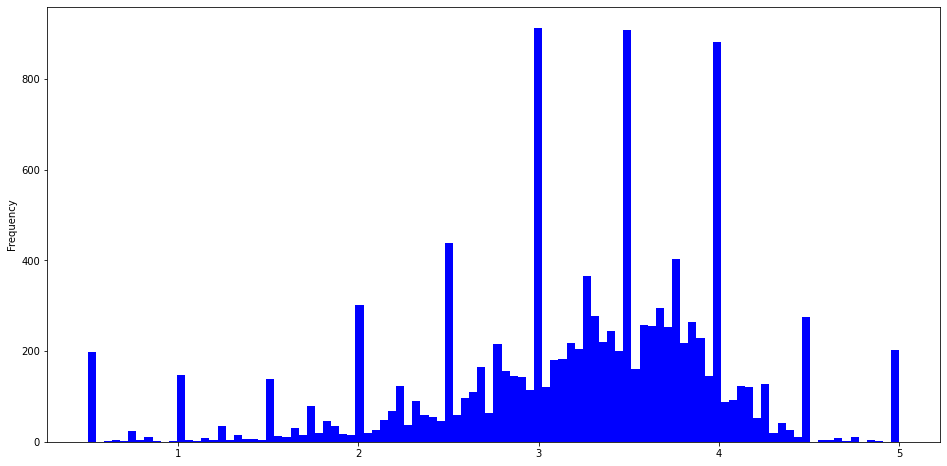

In [ ]:
ratings_mean_count['mean'].plot(bins = 100, kind = 'hist', color = 'blue', figsize = (16,8));

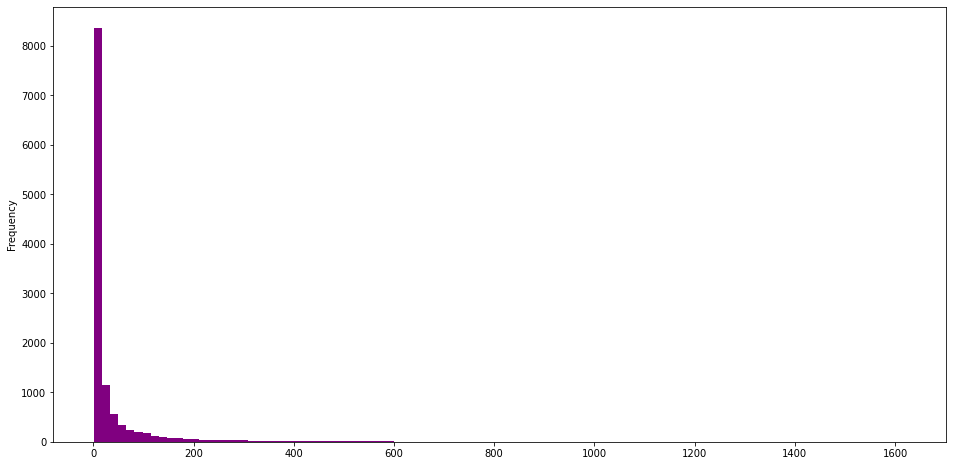

In [ ]:
ratings_mean_count['count'].plot(bins = 100, kind = 'hist', color = 'purple', figsize = (16,8));

When viewing films that have only 5 star ratings as their mean value, we see that only a small percentage of the dataset, 113 films, actually have 5 star mean reviews. In addition, only two films have more than 1 review. 

In [ ]:
ratings_mean_count[ratings_mean_count['mean'] == 5 ]

,mean,count
title,,
...And God Spoke (1993),5.0,1.0
12 (2007),5.0,1.0
911 in Plane Site (2004),5.0,1.0
Abendland (2011),5.0,1.0
Alice in the Cities (Alice in den Stadten) (1974),5.0,1.0
...,...,...
White Palace (1990),5.0,1.0
"Wild Geese, The (1978)",5.0,1.0
Wish I Was Here (2014),5.0,1.0


In [ ]:
ratings_mean_count[(ratings_mean_count['mean'] == 5) & (ratings_mean_count['count'] > 1)]

,mean,count
title,,
"Amor brujo, El (Love Bewitched, A) (1986)",5.0,2.0
Anne of the Thousand Days (1969),5.0,2.0
Harper (1966),5.0,2.0
Innocent Voices (Voces inocentes) (2004),5.0,2.0
"My Mother's Castle (Château de ma mère, Le) (1990)",5.0,3.0
Sonic Outlaws (1995),5.0,3.0
War and Peace (Jang Aur Aman) (2001),5.0,2.0


Visualize the most top 100 most rated films, that is films great count values. To do this, we will sort the values in ascending order (start with the greatest value). The film with the greatest number of reviews is the 1994 film *Pulp Fiction* with 67,310 and an average rating of 4.17.

In [ ]:
ratings_mean_count.sort_values("count", ascending = False).head(100)

,mean,count
title,,
Pulp Fiction (1994),4.157927,1621.0
Forrest Gump (1994),4.048498,1598.0
"Silence of the Lambs, The (1991)",4.153171,1482.0
"Shawshank Redemption, The (1994)",4.462636,1472.0
Jurassic Park (1993),3.663617,1421.0
...,...,...
Shakespeare in Love (1998),3.833613,595.0
Trainspotting (1996),3.998316,594.0
"Truman Show, The (1998)",3.817259,591.0


## Item-Based Collaborative Filtering
### Filtering on one movie sample

We will use pivot table with userId and movieId, taking the rating for each item to create a two-dimensional matrix that a specific user has viewed using userId as our index and title as our column. So each row will consist of user a user with the column being the movies they have seen. It is highly unlikely that a user has viewed all movies, there we expect to see a lot of NA's or nan values. 

In [ ]:
UserID_MovieTitle = movie_rating_df.pivot_table(index = 'userId', columns = movie_rating_df['title'], values = 'rating')

In [ ]:
UserID_MovieTitle

title,$5 a Day (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(Untitled) (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...And God Spoke (1993),...And Justice for All (1979),.45 (2006),1-900 (06) (1994),10 (1979),10 Items or Less (2006),10 Rillington Place (1971),10 Things I Hate About You (1999),10 Years (2011),10 to Midnight (1983),"10,000 BC (2008)",100 Feet (2008),100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09\\""01 - September 11 (2002)""",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),...,Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zen Noir (2004),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Ziggy Stardust and the Spiders from Mars (1973),Zizek! (2005),Zodiac (2007),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),"Zombie Lake (Lac des morts vivants, Le) (Zombies Lake) (Lake of the Living Dead, The) (1981)",Zombie Strippers! (2008),Zombie and the Ghost Train (Zombie ja Kummitusjuna) (1991),Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zoom (2006),Zoot Suit (1981),Zorba the Greek (Alexis Zorbas) (1964),Zorro (1975),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu Dawn (1979),Zus & Zo (2001),[REC] (2007),[REC]² (2009),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Now we can view an individual movie using the UserID_MovieTitle variable. If we load an a movie, for instance *Star Wars (1977)*, then we can see every single user ID. This film in particular has the least amount of missing values compared to all other films with only 1,624 missing users. 



In [ ]:
PulpFiction = UserID_MovieTitle["Pulp Fiction (1994)"]
PulpFiction

userId
1       4.0
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
3241    5.0
3242    NaN
3243    3.5
3244    NaN
3245    NaN
Name: Pulp Fiction (1994), Length: 3245, dtype: float64

In [ ]:
pd.isnull(PulpFiction).sum()

1624

Next, we will create a dataframe calculating correlations between PulpFiction and the entire matrix. We can add a column containing the count of how many times the exact movie had been watched and reviewed. Our dataframe will then show the correlations between PulpFiction and every single movie along with the count. If we sort the correlation values in descending order, we see the most correlated movies with Pulp Fiction.

In [ ]:
PulpFiction_Correlations = pd.DataFrame(UserID_MovieTitle.corrwith(PulpFiction), columns = ['Correlation'])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
PulpFiction_Correlations = PulpFiction_Correlations.join(ratings_mean_count['count'])

In [ ]:
PulpFiction_Correlations.dropna(inplace = True)

In [ ]:
PulpFiction_Correlations.sort_values(by = 'Correlation', ascending= False)

,Correlation,count
title,,
Kim (1950),1.0,2.0
"Man of No Importance, A (1994)",1.0,4.0
Dear Wendy (2005),1.0,2.0
"Deaths of Ian Stone, The (2007)",1.0,2.0
"Dentist, The (1996)",1.0,2.0
...,...,...
"Deep, The (1977)",-1.0,2.0
Jackass Presents: Bad Grandpa (2013),-1.0,3.0
"First Time, The (2012)",-1.0,3.0


One of the major challenges using this method is the consideration of some of the movies with count number being outliers. Instead, we should focus on movies that have been reviewed many times. After we filter for movies with more than 80 reviews, we see a list of movies that make more sense for this familiar with the film Pulp Fiction and the titles on the list.

In [ ]:
PulpFiction_Correlations[PulpFiction_Correlations['count'] > 80].sort_values(by='Correlation', ascending = False).head()

,Correlation,count
title,,
Pulp Fiction (1994),1.000000,1621.0
Reservoir Dogs (1992),0.549274,657.0
Zombieland (2009),0.516632,107.0
"Outlaw Josey Wales, The (1976)",0.515096,100.0
Band of Brothers (2001),0.464942,107.0


### Filter on Whole Dataset

Using the previous UserID_MovieTitle variable, containing every user and their ratings for movies, we can obtain the correlations for every movie. We obtain all the correlations by specifying the *.corr()* method passing in 'pearson' as our choice of correlation method. 

In [ ]:
film_correlations = UserID_MovieTitle.corr(method = 'pearson', min_periods = 80)

In [ ]:
UserID_MovieTitle.columns[UserID_MovieTitle.columns.str.contains('200')]

Index(['$5 a Day (2008)', ''Hellboy': The Seeds of Creation (2004)',
       ''Salem's Lot (2004)', '(500) Days of Summer (2009)',
       '(Untitled) (2009)', '.45 (2006)', '10 Items or Less (2006)',
       '10,000 BC (2008)', '100 Feet (2008)', '100 Girls (2000)',
       ...
       'Zombie Strippers! (2008)', 'Zombieland (2009)', 'Zoolander (2001)',
       'Zoom (2006)', 'Zus & Zo (2001)', '[REC] (2007)', '[REC]² (2009)',
       'loudQUIETloud: A Film About the Pixies (2006)', 'xXx (2002)',
       'xXx: State of the Union (2005)'],
      dtype='object', name='title', length=3860)

In [ ]:
MyPreferences = pd.DataFrame({'title' : ['Zoolander (2001)', 'Truman Show, The (1998)'], 'rating' : [2, 5]})
MyPreferences

,title,rating
0,Zoolander (2001),2
1,"Truman Show, The (1998)",5


We will use the correlations with my movie preferences and ratings. We will create a loop interating through each correlation to examine if there are any films that correlate with my movie preferences. Then we will sort that series in descending order with only the top 10 movies.

In [ ]:
potential_recommendations = pd.Series(dtype = 'float64')

for i in range(0,2):
  similar_movie = film_correlations[MyPreferences['title'][i]].dropna()
  similar_movie = similar_movie.map(lambda x: x * MyPreferences['rating'][i])
  potential_recommendations = potential_recommendations.append(similar_movie)

In [ ]:
potential_recommendations.sort_values(inplace = True, ascending= False)
print(potential_recommendations.head(10))

Truman Show, The (1998)                         5.000000
Hot Fuzz (2007)                                 2.176872
Life Aquatic with Steve Zissou, The (2004)      2.113916
Red Dragon (2002)                               2.085051
Waking Ned Devine (a.k.a. Waking Ned) (1998)    2.049264
Beautiful Mind, A (2001)                        2.025415
Mulan (1998)                                    2.016261
Cop Land (1997)                                 2.015659
Zoolander (2001)                                2.000000
Psycho (1960)                                   1.985298
dtype: float64


In [ ]:
MyPreferences['rating'][0]

2

This concludes the recommender system project, I actually do like most of the movies mentioned, and now I have 2 more movies to watch.